In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from pymongo import MongoClient
import certifi
from  dotenv import load_dotenv

In [2]:
import os 
load_dotenv()
DATABASE_URL = os.getenv("DATABASE_URL") # load from .env file
DATABASE_NAME = "wineData"
COLLECTION_NAME = "wineCollection"

In [3]:
# connect to the database
client = MongoClient(DATABASE_URL , tlsCAFile = certifi.where())

In [4]:
# get the database
database = client[DATABASE_NAME]
# get the collection
collection = database[COLLECTION_NAME]

In [5]:
# get all data from the database(checking data pushed have any issue or not)
data_list = list(collection.find())
len(data_list)

6497

In [6]:
df = pd.DataFrame(data_list)
df.shape

(6497, 14)

In [7]:
df.head()

,_id,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,68afcc53c87d04415342d4fb,white,6.0,0.180,0.31,1.4,0.036,14.0,75.0,0.99085,3.34,0.58,11.1,8
1,68afcc53c87d04415342d4fc,white,5.3,0.395,0.07,1.3,0.035,26.0,102.0,0.99200,3.50,0.35,10.6,6
2,68afcc53c87d04415342d4fd,red,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
3,68afcc53c87d04415342d4fe,white,6.4,0.220,0.34,1.4,0.023,56.0,115.0,0.98958,3.18,0.70,11.7,6
4,68afcc53c87d04415342d4ff,red,9.4,0.270,0.53,2.4,0.074,6.0,18.0,0.99620,3.20,1.13,12.0,7


In [8]:
# drop the _id column 
df.drop(columns = ['_id'] , axis = 1 , inplace = True)
df.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.0,0.180,0.31,1.4,0.036,14.0,75.0,0.99085,3.34,0.58,11.1,8
1,white,5.3,0.395,0.07,1.3,0.035,26.0,102.0,0.99200,3.50,0.35,10.6,6
2,red,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
3,white,6.4,0.220,0.34,1.4,0.023,56.0,115.0,0.98958,3.18,0.70,11.7,6
4,red,9.4,0.270,0.53,2.4,0.074,6.0,18.0,0.99620,3.20,1.13,12.0,7


In [9]:
# check for missing values 
df.isnull().sum()

wine type               0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- No missing values present.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine type             6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [11]:
# check the target column 
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

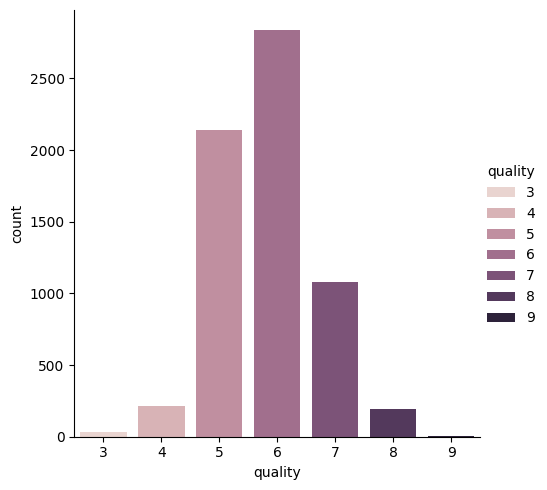

In [12]:
sns.catplot(x = 'quality' , data = df , kind = "count" , hue = 'quality')
plt.show()

- quality is categorical type(non-continous numerical values).
- most quality is 5 and 6.
- only 5 rows with quality of 9(outlier)

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


- looking like there are outliers in `fixed acidity` , `residual sugar` , `free sulfur dioxide` , `total sulfur dioxide` columns
- Also need to scale the values cause lot difference in value range for different columns

## Univariate Analysis

In [14]:
# wine type 
df['wine type'].value_counts(normalize = True)

wine type
white    0.753886
red      0.246114
Name: proportion, dtype: float64

In [16]:
# does the wine type related with quality? 
from scipy.stats import chi2_contingency

In [17]:
contingency_table = pd.crosstab(df['quality'] , df['wine type'])
p = chi2_contingency(contingency_table)[1]
p 

8.664347795982709e-23

- as value of p , 0.05 so wine type is not related to quality
- Drop this column

In [18]:
# fixed acidity column 
df['fixed acidity'].describe()

count    6497.000000
mean        7.215307
std         1.296434
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64

In [20]:
df[df['fixed acidity'] > 10]

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6,red,11.6,0.23,0.57,1.8,0.074,3.0,8.0,0.99810,3.14,0.70,9.9,6
30,red,10.4,0.43,0.50,2.3,0.068,13.0,19.0,0.99600,3.10,0.87,11.4,6
49,red,10.9,0.39,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
80,red,12.4,0.49,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,6
99,red,12.0,0.38,0.56,2.1,0.093,6.0,24.0,0.99925,3.14,0.71,10.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397,red,12.4,0.35,0.49,2.6,0.079,27.0,69.0,0.99940,3.12,0.75,10.4,6
6413,red,10.8,0.40,0.41,2.2,0.084,7.0,17.0,0.99840,3.08,0.67,9.3,6
6424,red,12.9,0.35,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0,7
6469,red,10.3,0.53,0.48,2.5,0.063,6.0,25.0,0.99980,3.12,0.59,9.3,6


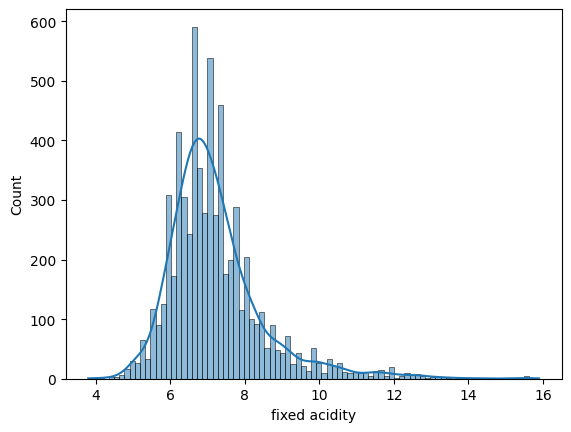

In [22]:
sns.histplot(df['fixed acidity'] , kde = True)
plt.show()

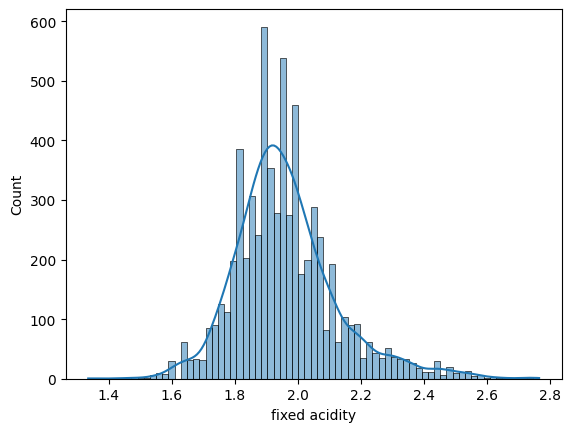

In [23]:
# looks like right skewed , let's check log transformation(no -ve value so log is safe)  
sns.histplot(np.log(df['fixed acidity']) , kde = True)
plt.show()

### volatile acidity 

In [24]:
df['volatile acidity'].describe()

count    6497.000000
mean        0.339666
std         0.164636
min         0.080000
25%         0.230000
50%         0.290000
75%         0.400000
max         1.580000
Name: volatile acidity, dtype: float64

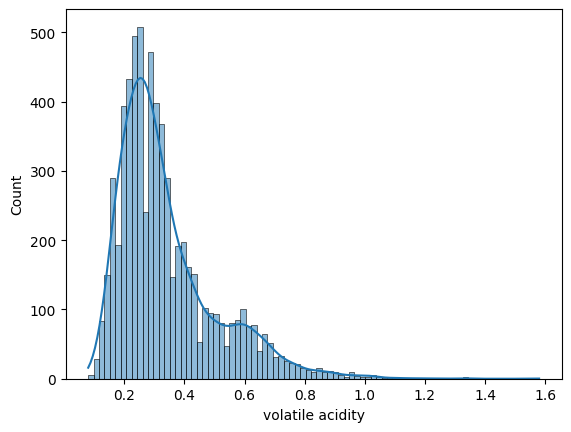

In [25]:
sns.histplot(df['volatile acidity'] , kde = True) 
plt.show()

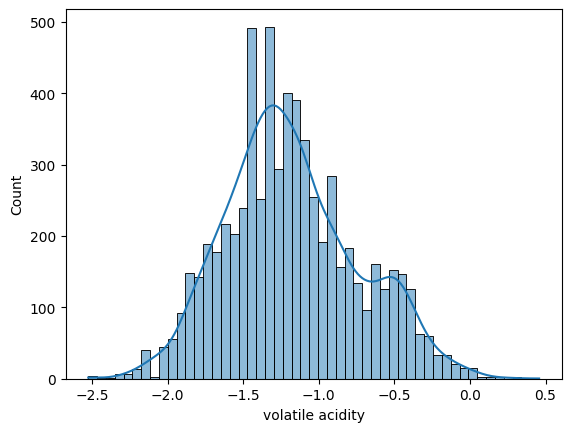

In [26]:
# right skewness problem
sns.histplot(np.log(df['volatile acidity']) , kde = True) 
plt.show()

`volatile acidity`
- no outlier 
- right skewed, so use log transformation as there are no -ve or 0
- max is 1.6 all values are very smalled, need scaling overall

### citric acid

In [27]:
df['citric acid'].describe()

count    6497.000000
mean        0.318633
std         0.145318
min         0.000000
25%         0.250000
50%         0.310000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64

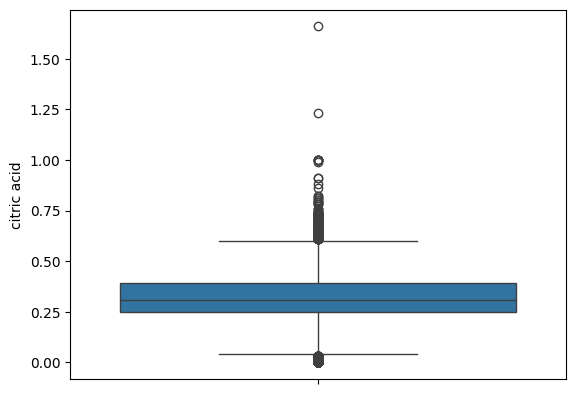

In [28]:
sns.boxplot(df['citric acid'])
plt.show()

In [33]:
df[df['citric acid'] > 0.95]

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
172,white,8.2,0.345,1.00,18.20,0.047,55.0,205.0,0.99965,2.96,0.43,9.6,5
498,white,7.5,0.400,1.00,19.50,0.041,33.0,148.0,0.99770,3.24,0.38,12.0,6
1256,white,7.7,0.490,1.00,19.60,0.030,28.0,135.0,0.99730,3.24,0.40,12.0,6
1727,red,9.2,0.520,1.00,3.40,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
2601,white,7.2,0.210,1.00,1.10,0.154,46.0,114.0,0.99310,2.95,0.43,9.2,6
4023,white,7.4,0.200,1.66,2.10,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6
4470,white,7.6,0.250,1.23,4.60,0.035,51.0,294.0,0.99018,3.03,0.43,13.1,6
4699,white,6.6,0.190,0.99,1.20,0.122,45.0,129.0,0.99360,3.09,0.31,8.7,6
5448,white,7.7,0.430,1.00,19.95,0.032,42.0,164.0,0.99742,3.29,0.50,12.0,6


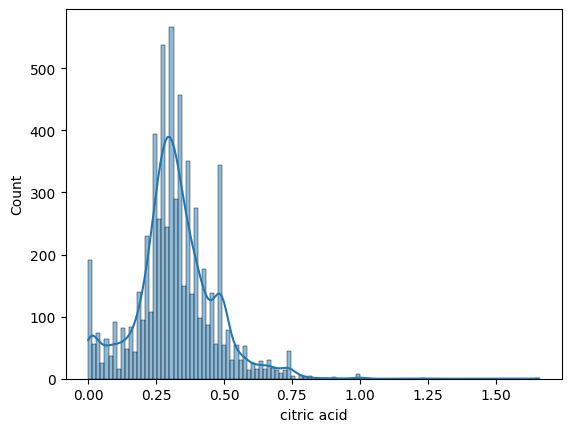

In [34]:
sns.histplot(df['citric acid'] , kde = True) 
plt.show()

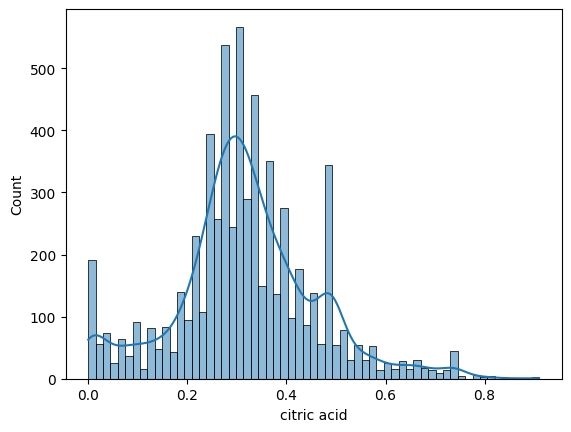

In [36]:
# lets check only using these rows with values 0.95 or less 
temp = df[df['citric acid'] < 0.95]
sns.histplot(temp['citric acid'] , kde = True) 
plt.show()

- values with greater than 0.95 is outlier remove all where value crosses the thresold

### residual sugar

In [38]:
df['residual sugar'].describe()

count    6497.000000
mean        5.443235
std         4.757804
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64

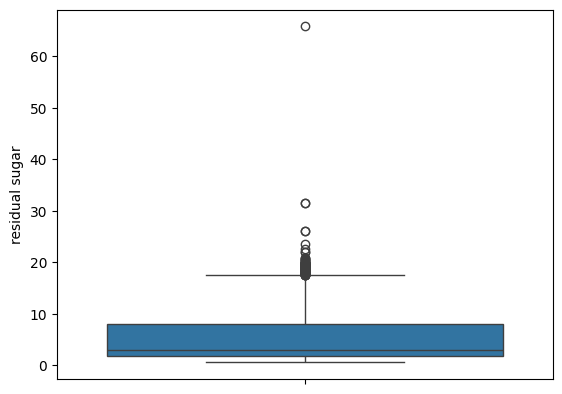

In [39]:
sns.boxplot(df['residual sugar'])
plt.show()

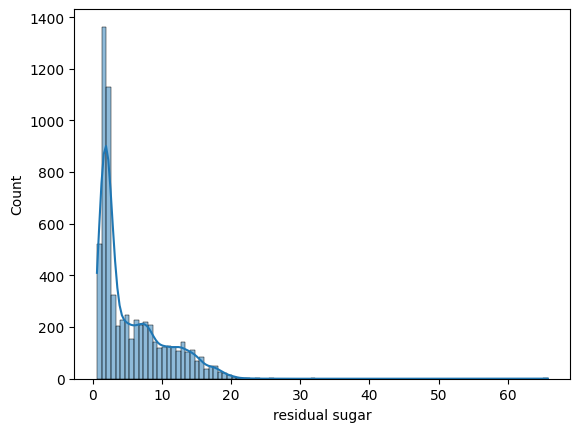

In [40]:
sns.histplot(df['residual sugar'] , kde = True) 
plt.show()

In [42]:
df[df['residual sugar'] > 25]

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3671,white,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
4701,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
5479,white,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
5857,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
6180,white,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6


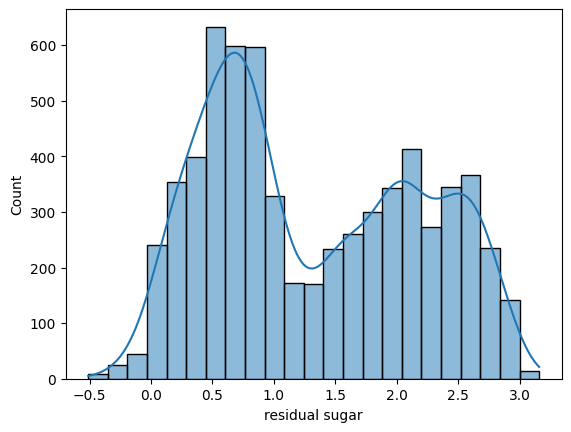

In [44]:
temp = df[df['residual sugar'] <= 25]
sns.histplot(np.log(temp['residual sugar']) , kde = True) 
plt.show()

### chlorides

In [45]:
df['chlorides'].describe()

count    6497.000000
mean        0.056034
std         0.035034
min         0.009000
25%         0.038000
50%         0.047000
75%         0.065000
max         0.611000
Name: chlorides, dtype: float64

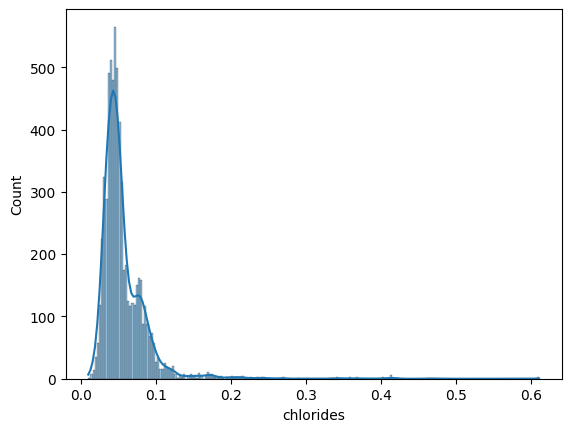

In [46]:
sns.histplot(df['chlorides'] , kde = True) 
plt.show()

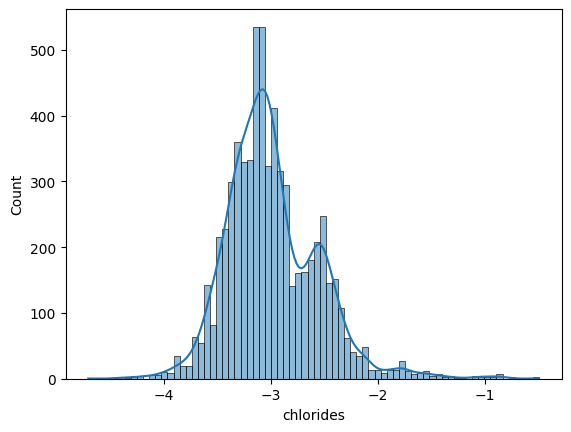

In [47]:
sns.histplot(np.log(df['chlorides']) , kde = True) 
plt.show()

- Data is right skewed so apply log transformer.

### free sulfur dioxide

In [50]:
df['free sulfur dioxide'].describe()

count    6497.000000
mean       30.525319
std        17.749400
min         1.000000
25%        17.000000
50%        29.000000
75%        41.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64

<Axes: ylabel='free sulfur dioxide'>

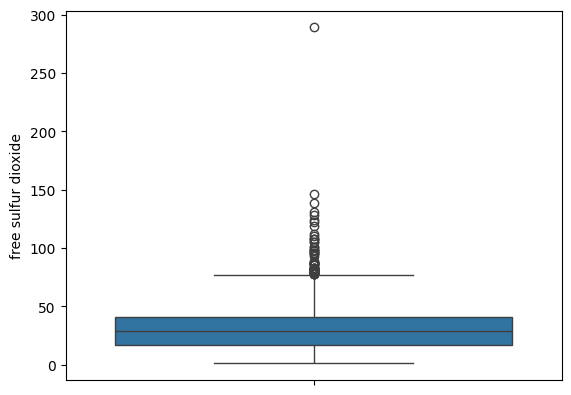

In [51]:
sns.boxplot(df['free sulfur dioxide'])

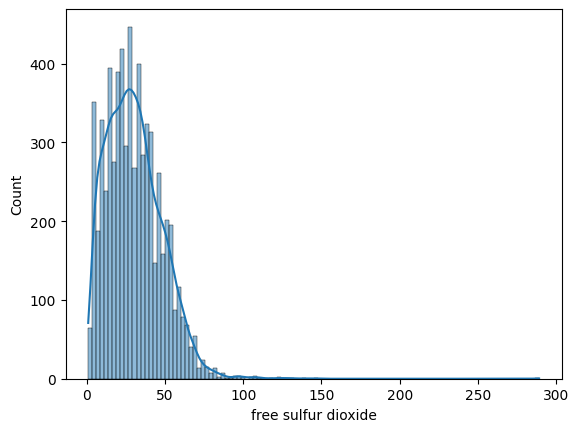

In [52]:
sns.histplot(df['free sulfur dioxide'] , kde = True)
plt.show()

In [54]:
df[df['free sulfur dioxide'] > 120].shape

(7, 13)

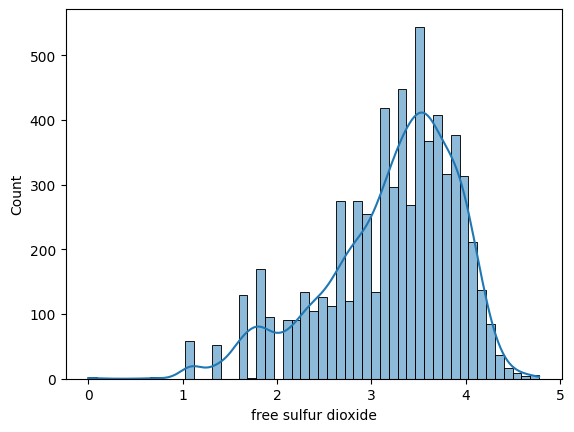

In [56]:
temp = df[df['free sulfur dioxide'] <= 120]
sns.histplot(np.log(temp['free sulfur dioxide']) , kde = True)
plt.show()

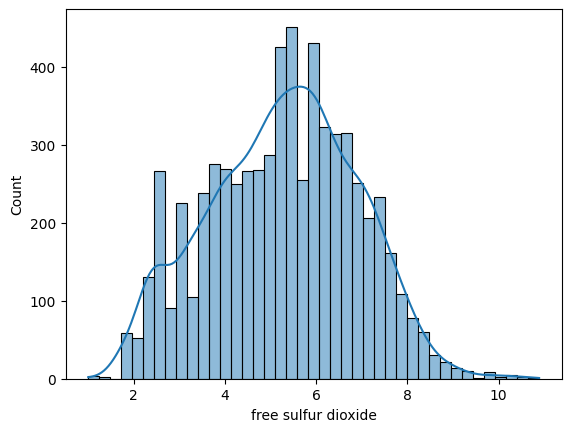

In [57]:
sns.histplot(np.sqrt(temp['free sulfur dioxide']) , kde = True)
plt.show()

### total sulfur dioxide

In [58]:
df['total sulfur dioxide'].describe()

count    6497.000000
mean      115.744574
std        56.521855
min         6.000000
25%        77.000000
50%       118.000000
75%       156.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

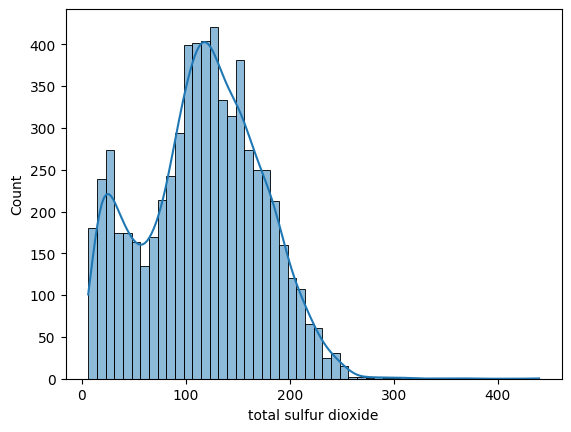

In [59]:
sns.histplot(df['total sulfur dioxide'] , kde = True)
plt.show()

In [60]:
df[df['total sulfur dioxide'] > 280].shape

(9, 13)

<Axes: xlabel='total sulfur dioxide', ylabel='Count'>

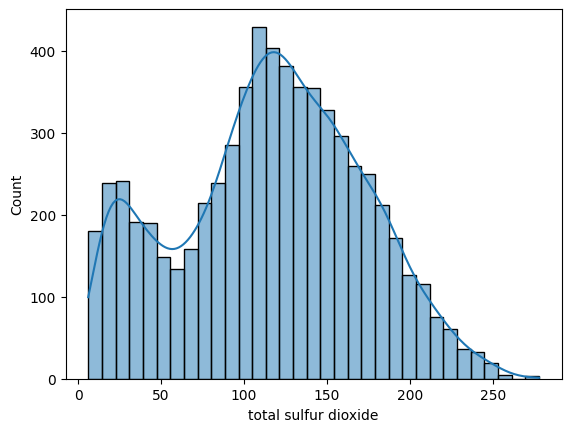

In [61]:
temp = df[df['total sulfur dioxide'] <= 280]
sns.histplot(temp['total sulfur dioxide'] , kde = True)

- remove values > 280 cause they are outliers

### density

In [63]:
df['density'].describe()

count    6497.000000
mean        0.994697
std         0.002999
min         0.987110
25%         0.992340
50%         0.994890
75%         0.996990
max         1.038980
Name: density, dtype: float64

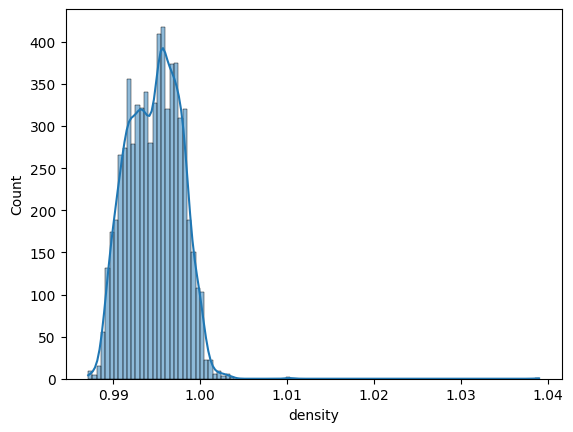

In [64]:
sns.histplot(df['density'] , kde = True) 
plt.show()

- keep as it is

In [68]:
df.columns

Index(['wine type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [69]:
df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

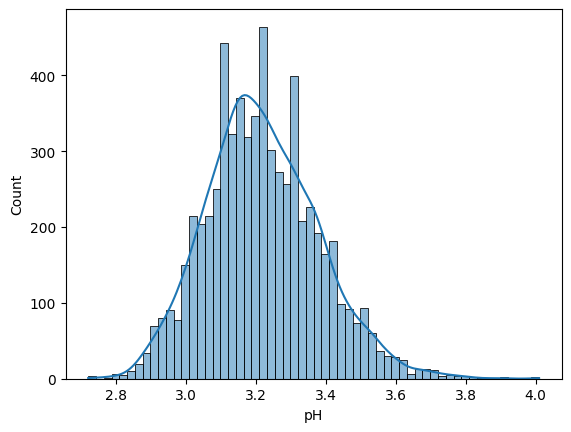

In [70]:
sns.histplot(df['pH'] , kde = True) 
plt.show()

### sulphates

In [71]:
df['sulphates'].describe()

count    6497.000000
mean        0.531268
std         0.148806
min         0.220000
25%         0.430000
50%         0.510000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64

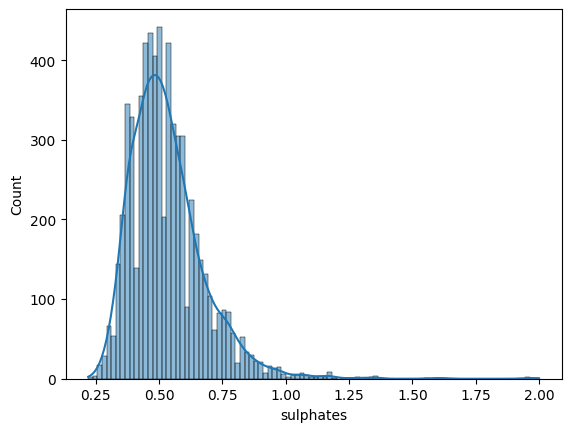

In [72]:
sns.histplot(df['sulphates'] , kde = True)
plt.show()

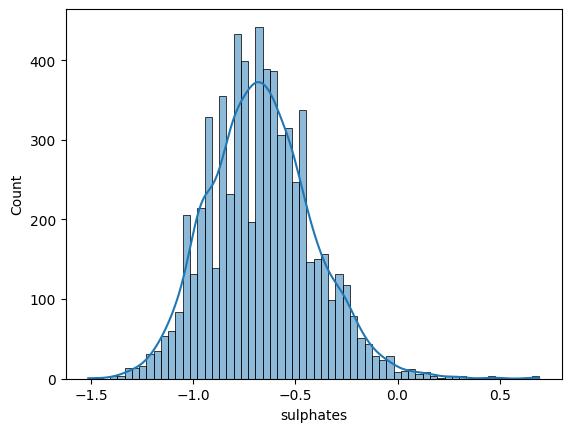

In [74]:
sns.histplot(np.log(df['sulphates']) , kde = True)
plt.show()

### alcohol

In [75]:
df['alcohol'].describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

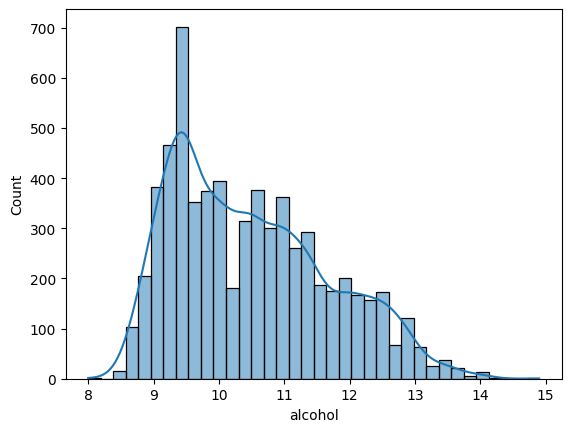

In [76]:
sns.histplot(df['alcohol'] , kde = True) 
plt.show()

## Binavariate Analysis

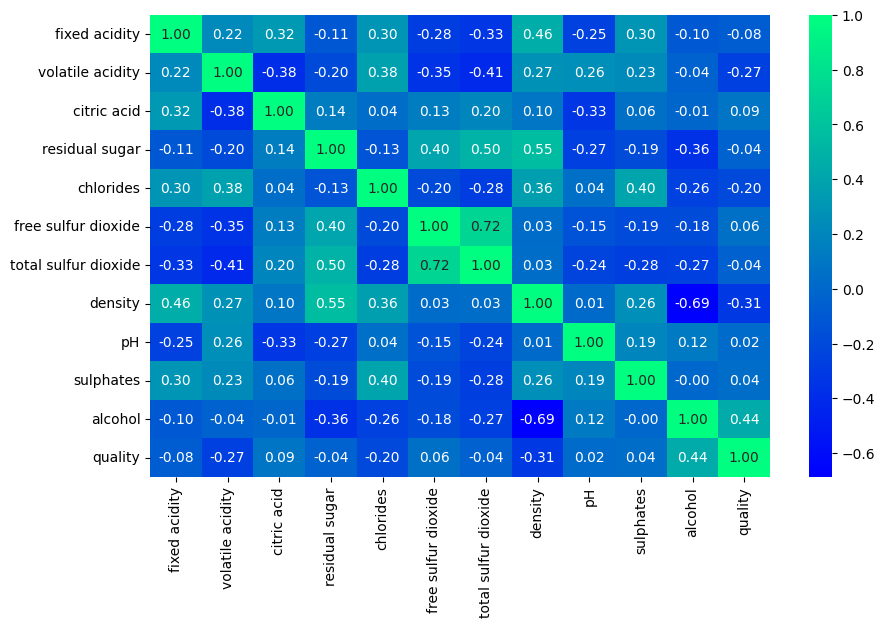

In [84]:
plt.figure(figsize = (10 , 6))
sns.heatmap(df.corr(numeric_only = True) , annot = True , fmt = ".2f" , cmap = 'winter')
plt.show()

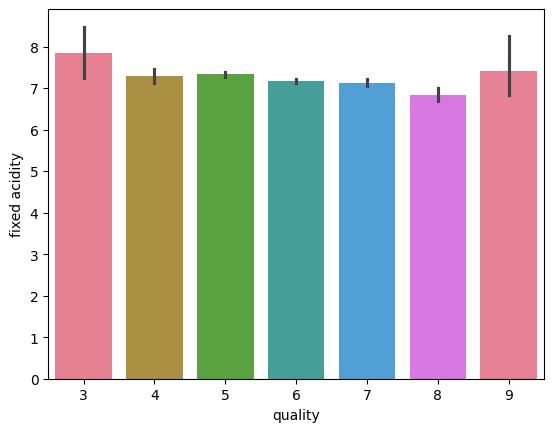

In [89]:
# fixed acidity v/s quality
sns.barplot(x = 'quality' , y = 'fixed acidity' , data = df , palette = "husl" , hue="quality" , legend = False) 
plt.show()

- fixed acidity is almost same for all quality , also correlation is -0.08 not really correlated
- drop this feature 

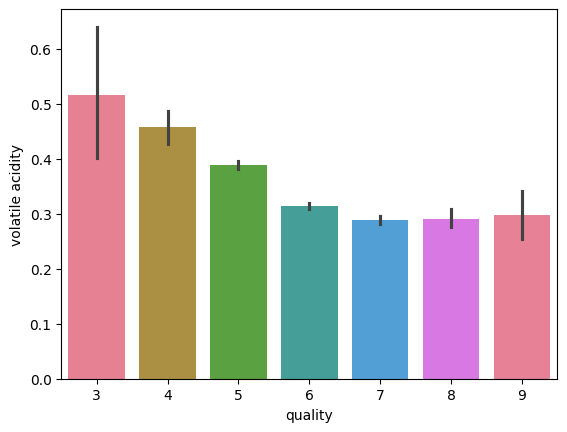

In [91]:
# volatile acidity v/s quality
sns.barplot(x = 'quality' , y = 'volatile acidity' , data = df , palette = "husl" , hue="quality" , legend = False) 
plt.show()

- as `volatile acidity` is increasing the quality is increasing.

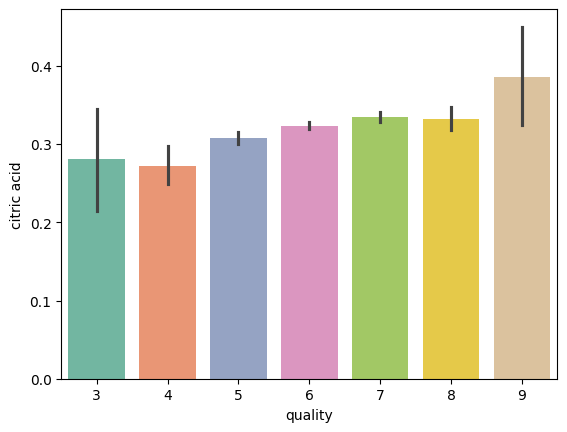

In [92]:
# citric acid v/s quality
sns.barplot(x = 'quality' , y = 'citric acid' , data = df , palette = "Set2" , hue="quality" , legend = False) 
plt.show()

- as value of `citric acid` is increasing `quality` of wine is also incresing

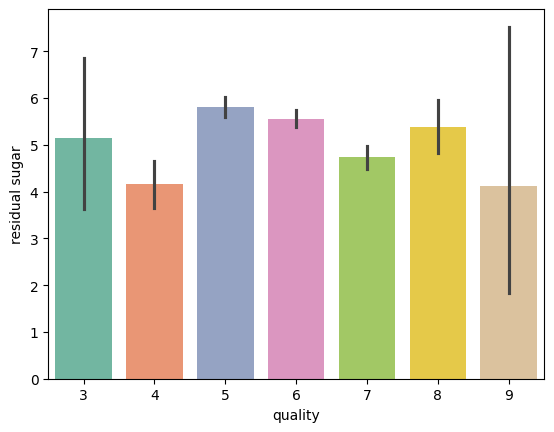

In [94]:
# residual sugar v/s quality
sns.barplot(x = 'quality' , y = 'residual sugar' , data = df , palette = "Set2" , hue="quality" , legend = False) 
plt.show()

- `residual sugar` is high for mid quality(~5 to 6) wine.
- if `residual sugar` is very high then it `high` quality or `low` quality

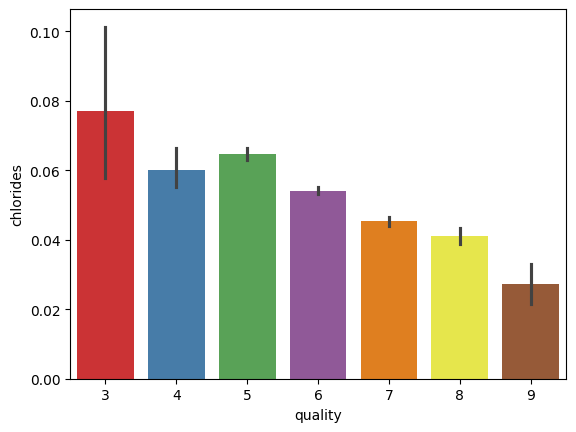

In [95]:
# chlorides v/s quality
sns.barplot(x = 'quality' , y = 'chlorides' , data = df , palette = "Set1" , hue="quality" , legend = False) 
plt.show()

- as `chlorides` is decreasing the `quality` of wine is increasing.
- Highly negetive correlation. 

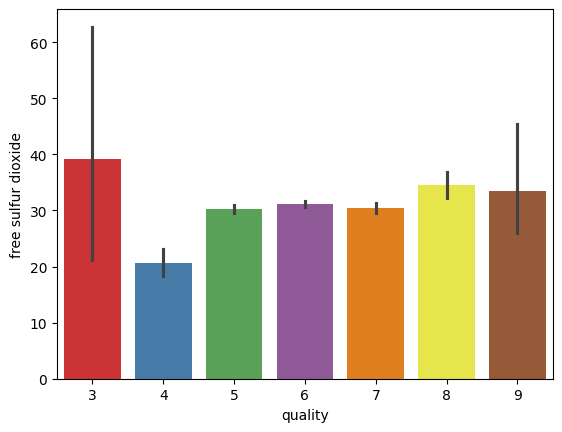

In [96]:
# free sulfur dioxide v/s quality
sns.barplot(x = 'quality' , y = 'free sulfur dioxide' , data = df , palette = "Set1" , hue="quality" , legend = False) 
plt.show()

- `quality` is bad if `free sulfur dioxide` is too high.
- `quality` is also bad if `free sulfur dioxide` is too low.
- a mid level value of `free sulfur dioxide` good for high quality wine.

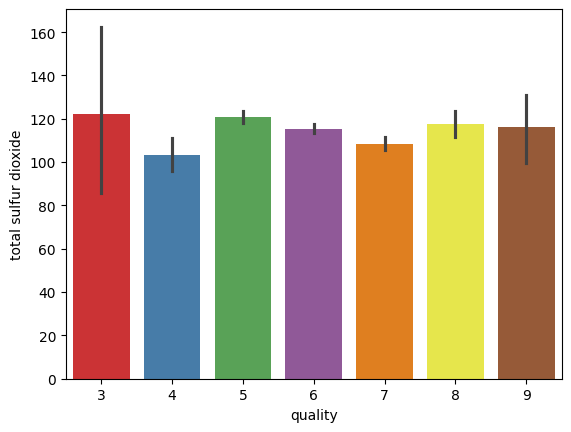

In [97]:
# total sulfur dioxide v/s quality
sns.barplot(x = 'quality' , y = 'total sulfur dioxide' , data = df , palette = "Set1" , hue="quality" , legend = False) 
plt.show()

- `quality` is not much dependend on `total sulfur dioxide`.
- almost similiar for all type of `quality`

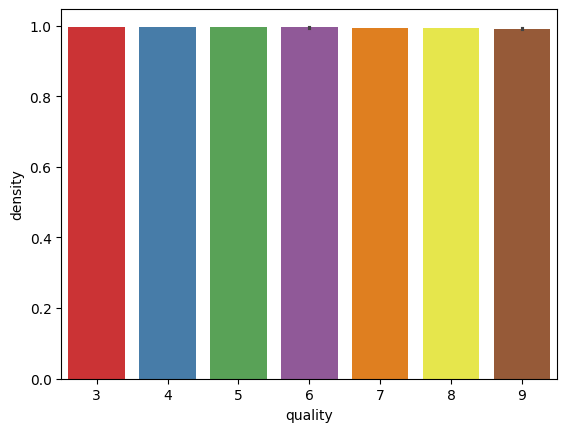

In [98]:
# density v/s quality
sns.barplot(x = 'quality' , y = 'density' , data = df , palette = "Set1" , hue="quality" , legend = False) 
plt.show()

- `density` is not changing for `quality` not an usefull column
- drop this column

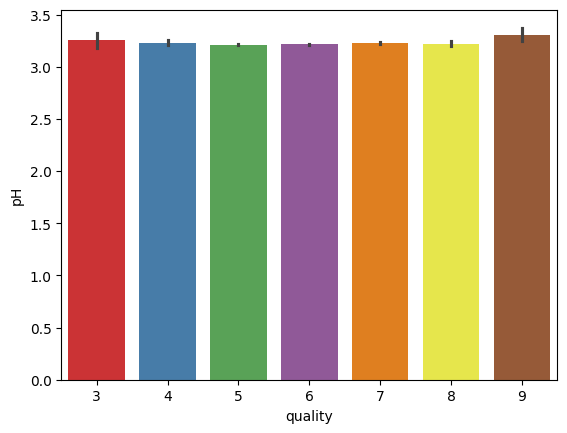

In [99]:
# pH v/s quality
sns.barplot(x = 'quality' , y = 'pH' , data = df , palette = "Set1" , hue="quality" , legend = False) 
plt.show()

- `pH` is not changing for `quality` not an usefull column
- drop this column

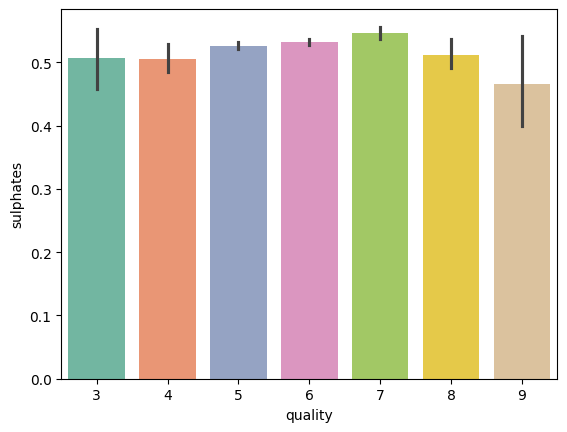

In [101]:
# sulphates v/s quality
sns.barplot(x = 'quality' , y = 'sulphates' , data = df , palette = "Set2" , hue="quality" , legend = False) 
plt.show()

- `quality` is not really depending on `sulphates`
- almost same for all quality value.
- but interestingly, a little bit low when `quality` is 9(highest)
- So we can drop this.

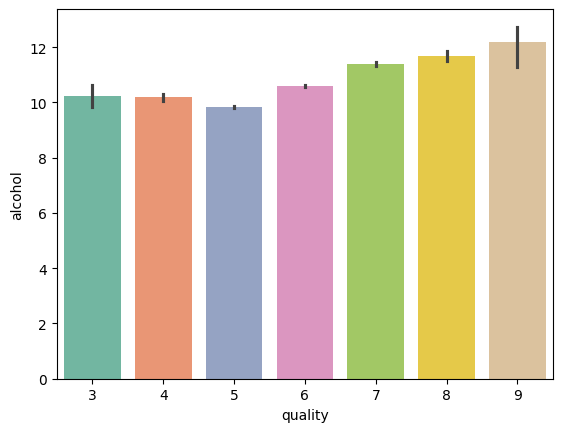

In [102]:
# alcohol v/s quality
sns.barplot(x = 'quality' , y = 'alcohol' , data = df , palette = "Set2" , hue="quality" , legend = False) 
plt.show()

- As value of `alcohol` is `increasing quality` of wine is also increasing.

In [12]:
df.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.0,0.180,0.31,1.4,0.036,14.0,75.0,0.99085,3.34,0.58,11.1,8
1,white,5.3,0.395,0.07,1.3,0.035,26.0,102.0,0.99200,3.50,0.35,10.6,6
2,red,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
3,white,6.4,0.220,0.34,1.4,0.023,56.0,115.0,0.98958,3.18,0.70,11.7,6
4,red,9.4,0.270,0.53,2.4,0.074,6.0,18.0,0.99620,3.20,1.13,12.0,7


In [13]:
df.to_csv("wine.csv")